In [133]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf

In [134]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
# Load Data 
with open('/content/drive/MyDrive/Colab Notebooks/Data/data_emotions.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

# Reshape Data
x_pre_1 = x_train[4]
x_pre_2 = x_train[22]
x_pre_3 = x_train[49]
x_pre_4 = x_train[68]

# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 11)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

In [137]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(11, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_57 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_59 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [ ]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 1000, validation_split = 0.2)

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 271ms/step - loss: 1.3485e-06 - acc: 1.0000 - val_loss: 5.4313 - val_acc: 0.3750
Epoch 2/1000
2/2 [==============================] - 0s 97ms/step - loss: 1.9461 - acc: 0.8438 - val_loss: 7.3729 - val_acc: 0.3750
Epoch 3/1000
2/2 [==============================] - 0s 94ms/step - loss: 0.6974 - acc: 0.9062 - val_loss: 3.2714 - val_acc: 0.2500
Epoch 4/1000
2/2 [==============================] - 0s 97ms/step - loss: 0.9821 - acc: 0.5781 - val_loss: 1.9065 - val_acc: 0.1875
Epoch 5/1000
2/2 [==============================] - 0s 98ms/step - loss: 0.8293 - acc: 0.7188 - val_loss: 1.7220 - val_acc: 0.3125
Epoch 6/1000
2/2 [==============================] - 0s 96ms/step - loss: 0.7652 - acc: 0.8281 - val_loss: 1.3560 - val_acc: 0.4375
Epoch 7/1000
2/2 [==============================] - 0s 96ms/step - loss: 0.4429 - acc: 0.9062 - val_loss: 1.2913 - val_acc: 0.3750
Epoch 8/1000
2/2 [==============================] - 0s 94ms/step - loss: 0.2358 - acc: 0.93

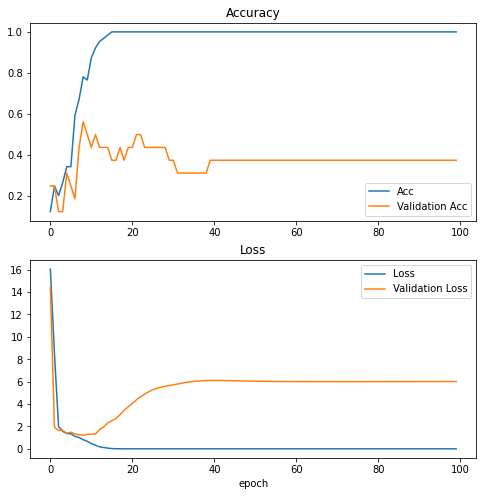

In [139]:
plot_history(his)

In [140]:
label = ['Happy','Sad','Angry','Surprise']

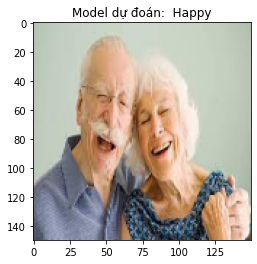

In [148]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_1.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

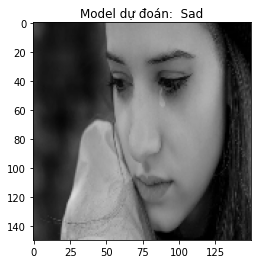

In [149]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_2.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

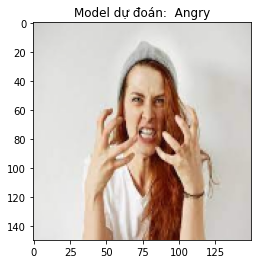

In [150]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_3.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_3, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

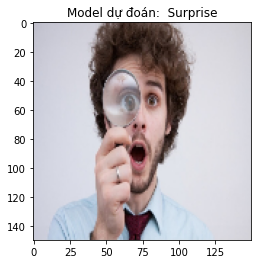

In [151]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_4.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_4, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

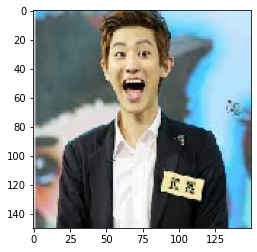

Sad


In [152]:
img = tf.keras.utils.load_img("/content/drive/MyDrive/Colab Notebooks/Data/test1.jpg", target_size = (150,150))
plt.imshow(img)
plt.show()
img = tf.keras.utils.img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /=255
print(label[np.argmax(model.predict(img))])

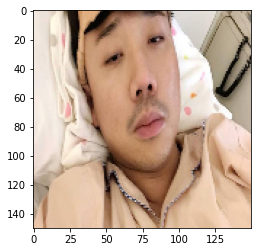

Happy


In [153]:
img = tf.keras.utils.load_img("/content/drive/MyDrive/Colab Notebooks/Data/test2.jpg", target_size = (150,150))
plt.imshow(img)
plt.show()
img = tf.keras.utils.img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /=255
print(label[np.argmax(model.predict(img))])

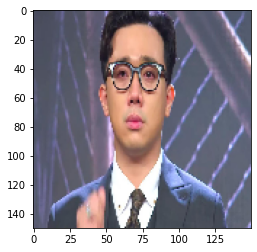

Happy


In [154]:
img = tf.keras.utils.load_img("/content/drive/MyDrive/Colab Notebooks/Data/test3.jpg", target_size = (150,150))
plt.imshow(img)
plt.show()
img = tf.keras.utils.img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /=255
print(label[np.argmax(model.predict(img),axis = 1)[0]])